In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading datasets


In [65]:
df_tracks=pd.read_csv('tracks.csv')
print(df_tracks.head())
df_tracks.info()

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [66]:
df_genere=pd.read_csv("SpotifyFeatures.csv")
print(df_genere.head())
df_genere.info()

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

Cleaning Data

In [67]:
print(df_tracks.isnull().sum())
print(df_genere.isnull().sum())
print("duplicates for trakcs dataset:",df_tracks.duplicated().sum())
print("duplicates for trakcs dataset:",df_genere.duplicated().sum())
# Will not rows containing null values because in future we might want to find most popular artists 
# and hence we want to make sure that it should not be dropped in this step


id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
duplicates for trakcs dataset: 0
duplicates for trakcs dataset: 0


In [68]:
# Fill NaN values with 0
df_tracks.fillna(0, inplace=True)
df_genere.fillna(0, inplace=True)


Preprocessing data

In [69]:
# converting the song durations from miliseconds to seconds

df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms", inplace = True, axis =1)
df_genere['duration']=df_genere['duration_ms'].apply(lambda x: round(x/1000))
df_genere.drop("duration_ms", inplace = True, axis =1)

In [70]:
print(df_tracks['name'].iloc[1:3])
print(df_tracks.loc[8])


1    Capítulo 2.16 - Banquero Anarquista
2     Vivo para Quererte - Remasterizado
Name: name, dtype: object
id                      0IgI1UCz84pYeVetnl1lGP
name                        Old Fashioned Girl
popularity                                   0
explicit                                     0
artists                        ['Greg Fieler']
id_artists          ['5nWlsH5RDgFuRAiDeOFVmf']
release_date                              1922
danceability                             0.488
energy                                   0.475
key                                          0
loudness                               -16.222
mode                                         0
speechiness                             0.0399
acousticness                              0.62
instrumentalness                       0.00645
liveness                                 0.107
valence                                  0.544
tempo                                  139.952
time_signature                               4

Analysing


In [71]:
#MOST POPULAR
mostPopular=df_tracks.sort_values(['popularity'],ascending=False)
print("20 Most popular Songs and their artists are:")
print(mostPopular[['artists','name']].head(20).reset_index(drop=True))

20 Most popular Songs and their artists are:
                                              artists  \
0        ['Justin Bieber', 'Daniel Caesar', 'Giveon']   
1                                  ['Olivia Rodrigo']   
2                                     ['Masked Wolf']   
3                                      ['The Weeknd']   
4                                      ['Kali Uchis']   
5      ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']   
6                                      ['The Weeknd']   
7                                          ['Tiësto']   
8                                          ['Giveon']   
9                             ['Myke Towers', 'Juhn']   
10  ['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...   
11        ['Los Legendarios', 'Wisin', 'Jhay Cortez']   
12                                       ['Doja Cat']   
13                                  ['The Kid LAROI']   
14                                            ['SZA']   
15                           ['Bad Bunny', 

In [72]:
#LEAST POPULAR 
LeastPopular=df_tracks.sort_values(['popularity'],ascending=True)
print("20 Least popular Songs and their artists are:")
print(mostPopular[['artists','name']].head(20).reset_index(drop=True))

20 Least popular Songs and their artists are:
                                              artists  \
0        ['Justin Bieber', 'Daniel Caesar', 'Giveon']   
1                                  ['Olivia Rodrigo']   
2                                     ['Masked Wolf']   
3                                      ['The Weeknd']   
4                                      ['Kali Uchis']   
5      ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']   
6                                      ['The Weeknd']   
7                                          ['Tiësto']   
8                                          ['Giveon']   
9                             ['Myke Towers', 'Juhn']   
10  ['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...   
11        ['Los Legendarios', 'Wisin', 'Jhay Cortez']   
12                                       ['Doja Cat']   
13                                  ['The Kid LAROI']   
14                                            ['SZA']   
15                           ['Bad Bunny',

In [73]:
#Popularity of every artist
df_artist=df_tracks.groupby(['artists'])
artist_popularity = df_artist['popularity'].mean()
print("\nMean popularity for each artist:")
print(artist_popularity)


Mean popularity for each artist:
artists
["'In The Heights' Original Broadway Company", 'Mandy Gonzalez']    55.000000
["'Om' Alec Khaoli & Umoja"]                                        38.000000
["'T Hof Van Commerce", 'TLP']                                      29.000000
["'T Hof Van Commerce"]                                             25.166667
["'Til Tuesday"]                                                    35.875000
                                                                      ...    
['장정우']                                                             31.500000
['조정현']                                                             32.000000
['지선']                                                              41.500000
['지수']                                                              28.000000
['최진희']                                                             25.000000
Name: popularity, Length: 114030, dtype: float64


In [74]:
#Songs of Each artist
df_artist=df_tracks.groupby(['artists'])
df_count=df_artist['id'].count().sort_values(ascending=False)
print("No of songs of each artist")
print(df_count)

No of songs of each artist
artists
['Die drei ???']                                                       3856
['TKKG Retro-Archiv']                                                  2006
['Benjamin Blümchen']                                                  1503
['Bibi Blocksberg']                                                    1472
['Lata Mangeshkar']                                                    1373
                                                                       ... 
['Jess Penner']                                                           1
['Jess Ingerslev', 'Tritonus Koret']                                      1
['Jess Ingerslev', 'Bendt Reiner', 'Niels Weyde', 'Tritonus Koret']       1
['Jess Glynne', 'Jonas Blue']                                             1
['최진희']                                                                   1
Name: id, Length: 114030, dtype: int64


In [75]:
from datetime import datetime
# Define a function to parse dates
def parse_date(date_str):
    try:
        if len(date_str) == 4:  # Only year is provided
            return datetime.strptime(date_str, '%Y')
        else:  # Full date is provided
            return pd.to_datetime(date_str)
    except ValueError as e:
        print(f"Error parsing date: {e}")
        return None

# Apply the function to the 'Datetime' column
df_tracks['release_date'] = df_tracks['release_date'].apply(parse_date)

# Extract the year
df_tracks['Year'] = df_tracks['release_date'].apply(lambda x: x.year if pd.notnull(x) else None)

print(df_tracks['Year'])

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Name: Year, Length: 586672, dtype: int64


DATA VISUALIZATION

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature'),
 Text(14.5, 0, 'duration'),
 Text(15.5, 0, 'Year')]

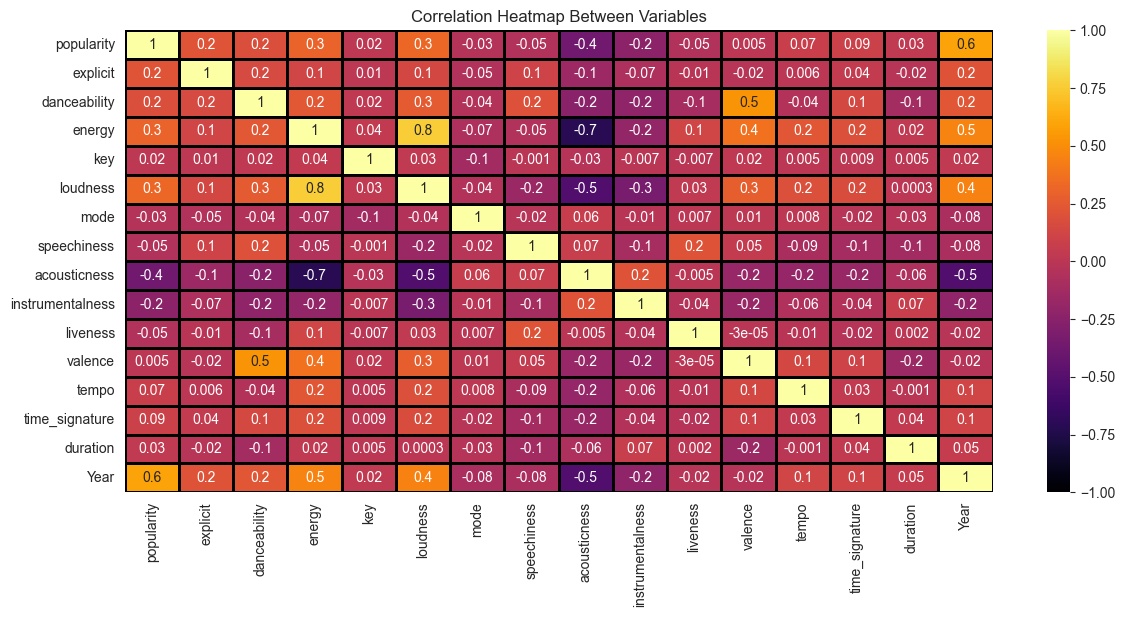

In [76]:
# Identify numeric columns
numeric_columns = df_tracks.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numeric columns
corr_df = df_tracks[numeric_columns].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation Heatmap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

[Text(0.5, 1.0, 'loudness vs energy correaltion')]

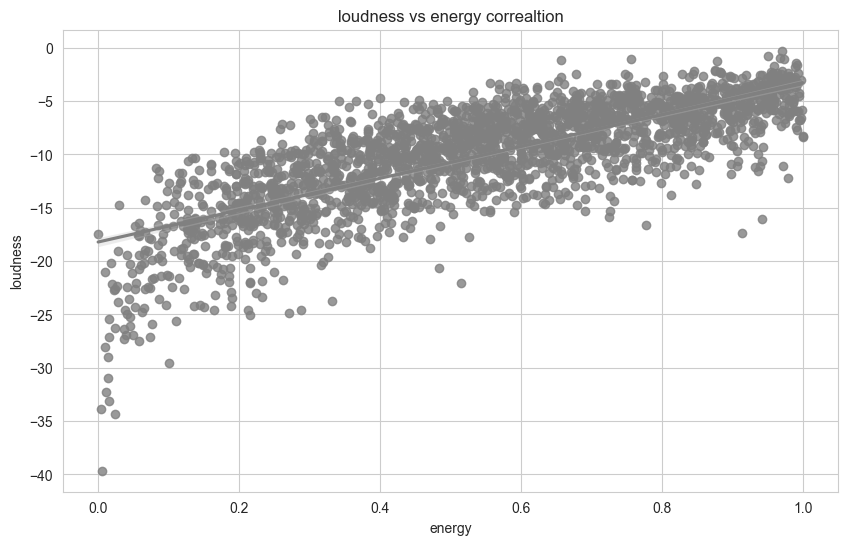

In [77]:
sample_df = df_tracks.sample(int(0.004* len(df_tracks)))
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df,y='loudness', x='energy',color = 'grey').set(title="loudness vs energy correaltion")

[Text(0.5, 1.0, 'popularity vs accousticness correaltion')]

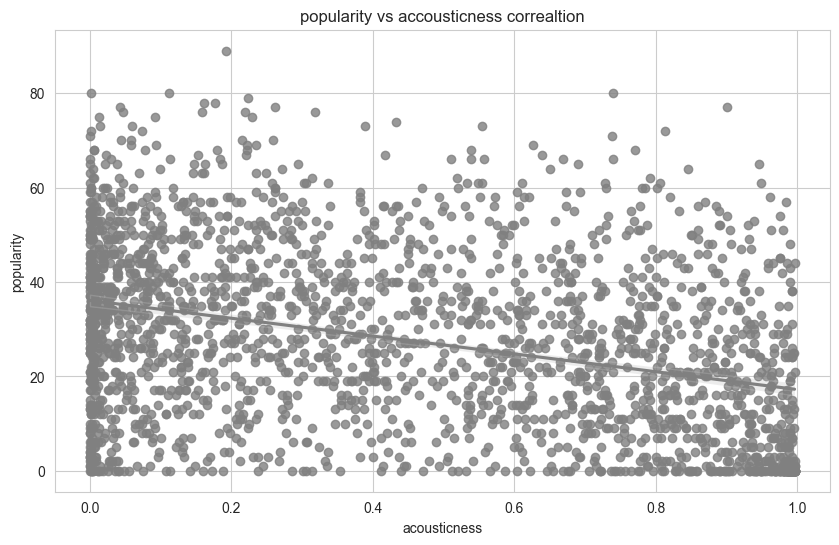

In [78]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df,y='popularity', x='acousticness',color = 'grey').set(title="popularity vs accousticness correaltion")

Year
1900        1
1922      294
1923      657
1924      633
1925      903
        ...  
2017     9889
2018    10936
2019    11907
2020    13937
2021     6281
Name: id, Length: 101, dtype: int64


c:\Users\sidhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


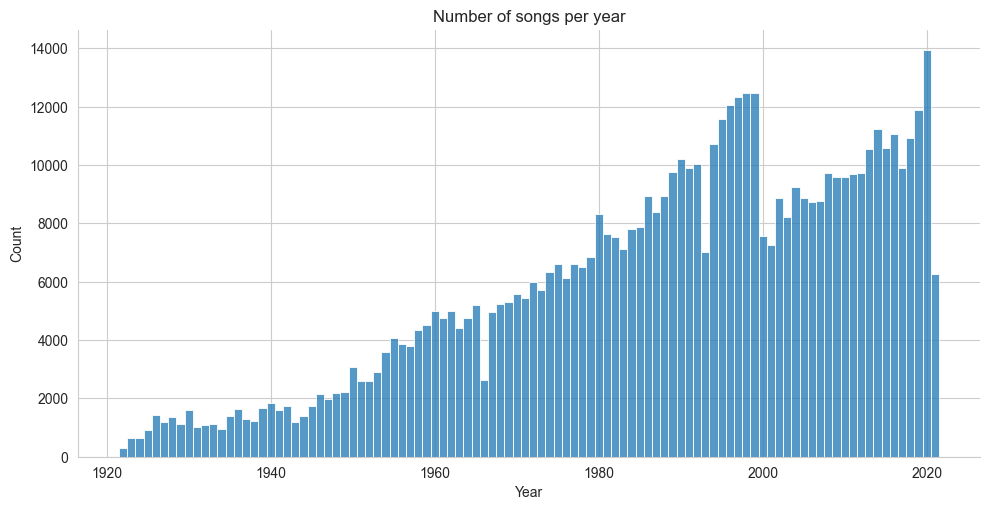

In [79]:
# df_tracks['newdate'] = pd.to_datetime(df_tracks['dates'], errors='coerce')
# df_tracks['Year'] = df_tracks['newdate'].dt.year
years=df_tracks.groupby(['Year'])
print(years['id'].count())
years = df_tracks[df_tracks['Year'] >= 1922]
sns.displot(years['Year'], discrete = True, aspect =2 , height = 5 , kind ='hist').set(title='Number of songs per year')


    Year  count
99  2020  13937
77  1998  12485
78  1999  12484
76  1997  12349
75  1996  12058
98  2019  11907
74  1995  11591
93  2014  11252
95  2016  11083
97  2018  10936


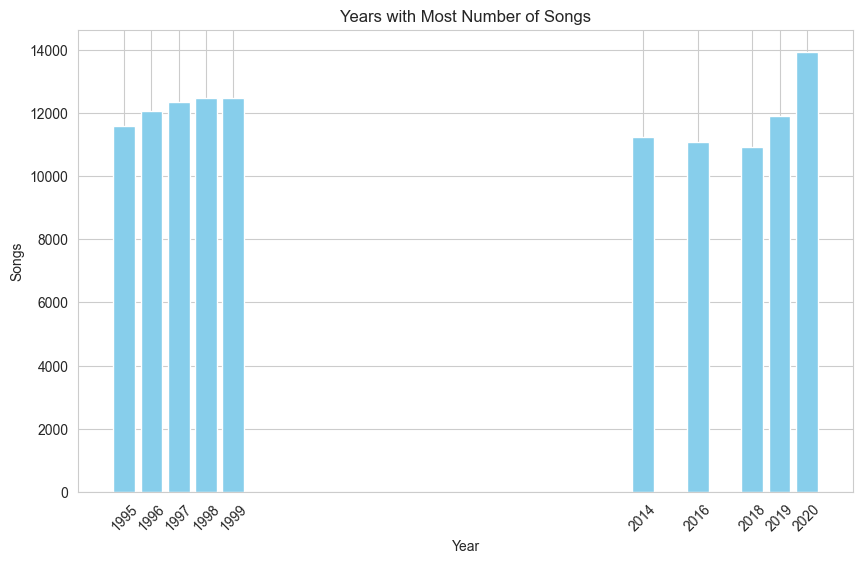

In [86]:
year_counts = df_tracks.groupby('Year')['id'].count().reset_index(name='count')
# Sort by Year

year_counts = year_counts.sort_values(by='count',ascending=False).head(10)
print(year_counts)
# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(year_counts['Year'], year_counts['count'], color='skyblue',width=0.8)
plt.xlabel('Year')
plt.ylabel('Songs')
plt.title('Years with Most Number of Songs')
plt.xticks(year_counts['Year'],rotation=45)
#plt.tight_layout()

# Show the plot
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

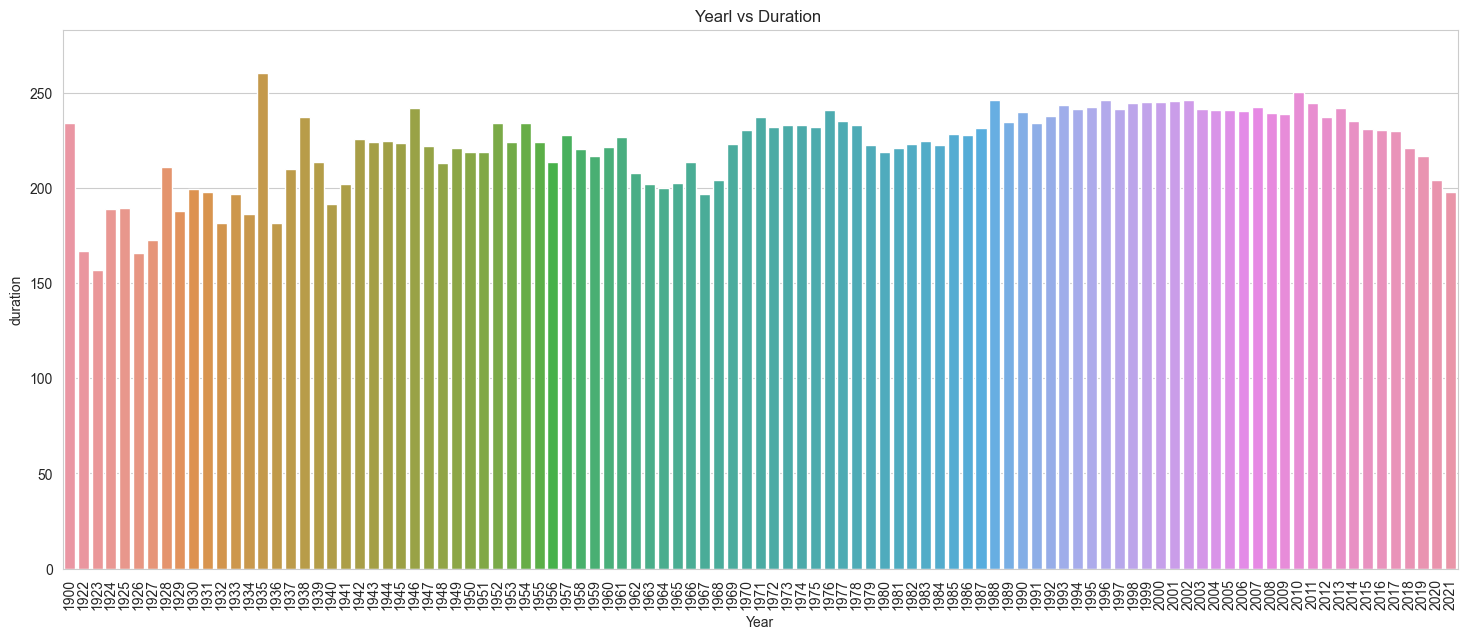

In [81]:
#total_dr = df_tracks['duration']
fig_dims = (18,7)
fig , ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x=df_tracks['Year'],y=df_tracks['duration'], ax= ax, errwidth = False).set(title ='Yearl vs Duration ')
plt.xticks(rotation =90)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

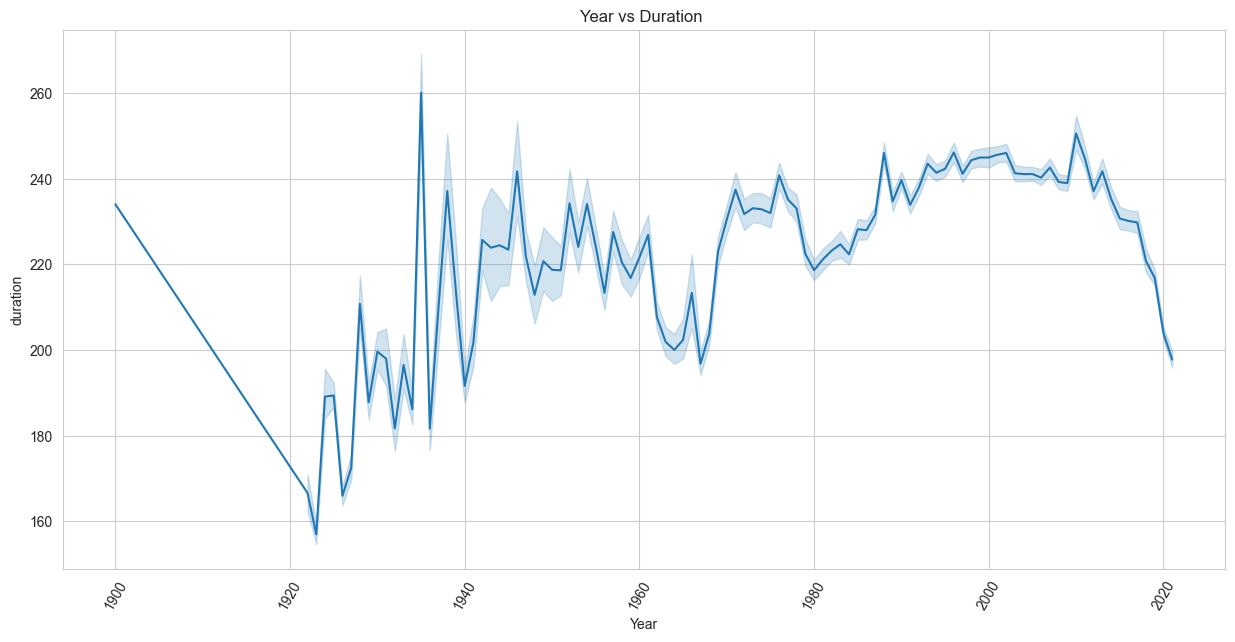

In [82]:

sns.set_style(style = 'whitegrid')
fig_dims = (15,7)
fig , ax = plt.subplots(figsize = fig_dims)
fig = sns.lineplot(x=df_tracks['Year'], y=df_tracks['duration'], ax= ax).set(title ='Year vs Duration ')
plt.xticks(rotation =60)

Text(0, 0.5, 'Genres')

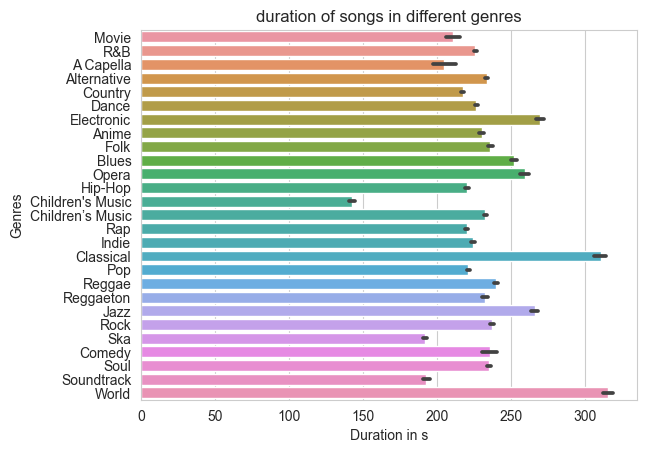

In [83]:
plt.title('duration of songs in different genres')
sns.color_palette("rocket" , as_cmap = True)
sns.barplot(y = 'genre' , x = 'duration', data = df_genere)
plt.xlabel('Duration in s')
plt.ylabel('Genres')


genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Name: popularity, dtype: float64


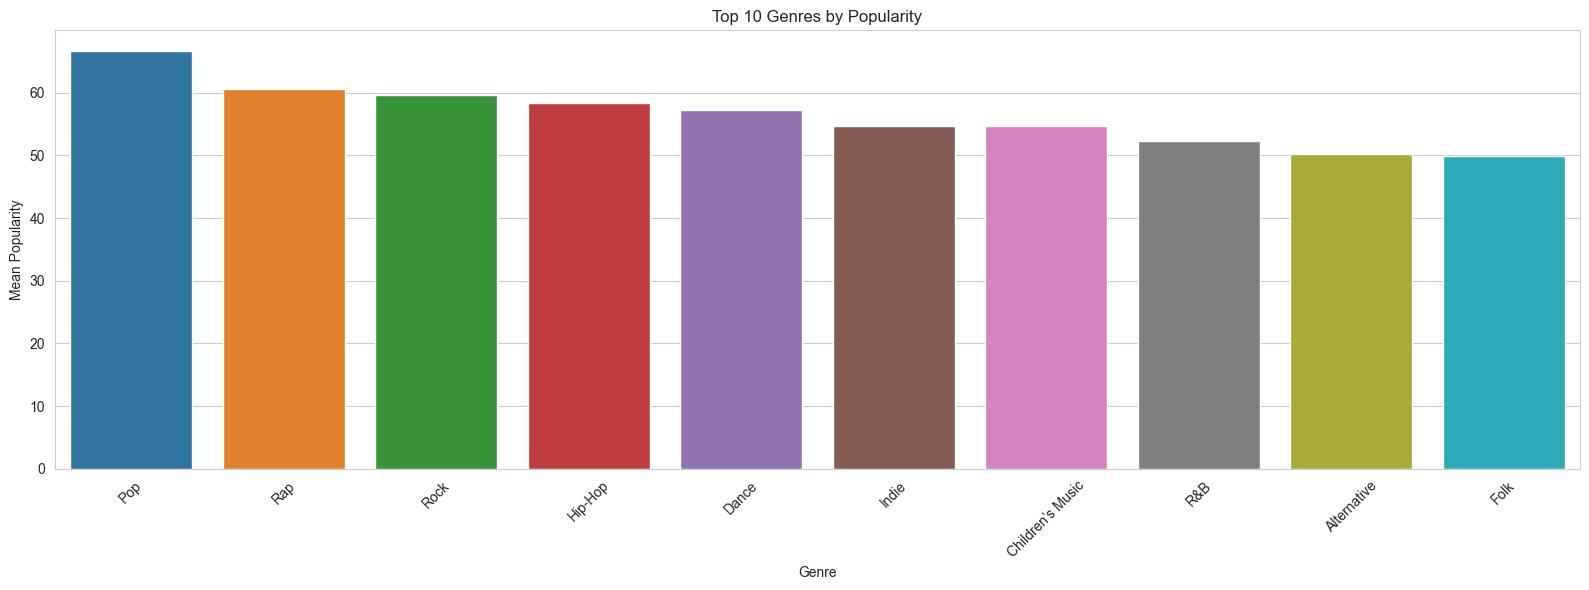

In [84]:
famous = df_genere.groupby('genre')['popularity'].mean()

# Sort by mean popularity and get the top 10 genres
famous = famous.sort_values(ascending=False).head(10)
print(famous)

# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(y=famous.values, x=famous.index).set(title='Top 10 Genres by Popularity')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.tight_layout()

# Show the plot
plt.show()
